# Import Dependencies

In [43]:
# Pandas and Numpy
import numpy as np 
import pandas as pd 

# Visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# ML Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Evaluation
import re
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Import Train and Test Data

In [2]:
df = pd.read_csv("D:/Titanic/titanicfull.csv")

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Data Set Columns Description

- pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- survived: Survival (0 = No; 1 = Yes)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- fare: Passenger fare (British pound)
- cabin: Cabin number, which looks like ‘C123’ (the letter refers to the deck)
- embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat
- body
- home.dest

# Data Exploration 

In [6]:
# General Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
# Statistics
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [9]:
# What are the columns that contain Null Values ?
total = df.isnull().sum().sort_values(ascending=False)

# Convert Number of Nulls to Percentage (SUM/COUNT)
percent_1 = df.isnull().sum()/df.isnull().count()*100

#Round the Percentages to one decimal point and sort them 
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# Create a DataFrame to see missing data
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1


In [10]:
df.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

## How Age and Sex affect survival?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

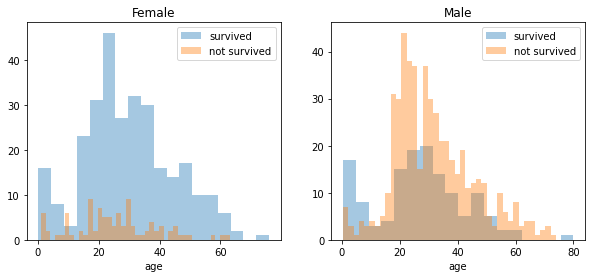

In [13]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

# Women DataFrame
women = df[df['sex']=='female']

# Men DataFrame
men = df[df['sex']=='male']

#Plotting the histogram for women who survived and their ages
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)

#Plotting the histogram for women who did not survive and their ages
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

#Plotting the histogram for men who survived and their ages
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)

#Plotting the histogram for men who did not survive and their ages
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

## What can we tell from these graphs?
### 1: Women had a higher survival chances than men.
### 2: Women who are older than 14 and younger than 40 had a higher survival chance than other women.
### 3: Infants (males or females) had a higher probability of survival.

## How Embarking Port, Passenger Class and Sex affect survival?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


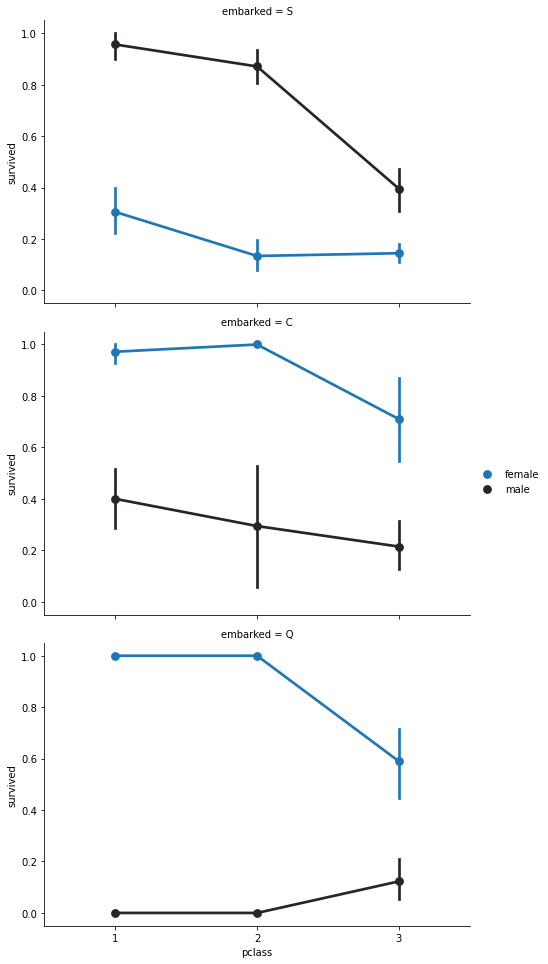

In [14]:
FacetGrid = sns.FacetGrid(df, row='embarked', size=4.5 , aspect=1.5)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex')
FacetGrid.add_legend()

### What can we tell?
#### Embarking port is highly correlated with survival, depending on the gender.
- Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. 
- Men have a higher survival chance if they are on port C, but a low chance if they are on port Q or S.

<br>**Interesting, isn't it!**

## Let's Passenger Class on its own regarless the gender, how it affects survival?

<AxesSubplot:xlabel='pclass', ylabel='survived'>

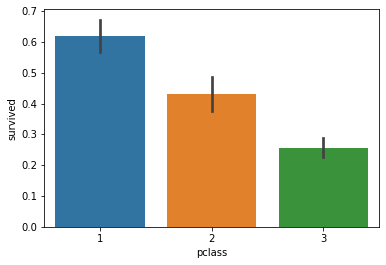

In [15]:
sns.barplot(x='pclass', y='survived', data=df)

### Aha!
- It is obvious that passenger class is contributing to a persons chance of survival,<br>especially if this person is in class 1!

### Can we confirm our hypothesis?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


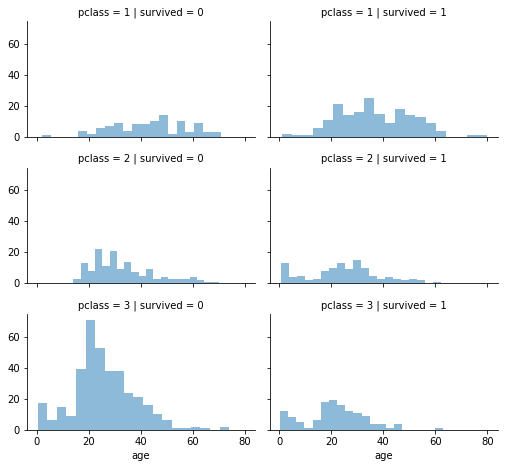

In [16]:
grid = sns.FacetGrid(df, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**True, The plots above confirm our hypothesis about first class passengers**<br>
**Note:** we can also clearly see that a person with third class will not survive!

## Alright, what's next?
- What can we do with Parch and SibSp?
- Remember that Parch refers to the Number of parents/children aboard
- and SibSp refers to the Number of siblings/spouses aboard
- We can add them together so we have a feature representing<br>the number of relatives in general
- Then we can use that feature to create another feature (boolean)<br>that indicates if the passenger is alone on the ship or he/she has relatives
- Let's do this!

In [18]:
df['relatives'] = df['sibsp'] + df['parch']
df.loc[df['relatives'] > 0, 'alone'] = 0
df.loc[df['relatives'] == 0, 'alone'] = 1
df['alone'] = df['alone'].astype(int)
df['alone'].value_counts()

1    790
0    519
Name: alone, dtype: int64

In [19]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,relatives,alone
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0


## Let's see if having relatives or not affect survival!

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


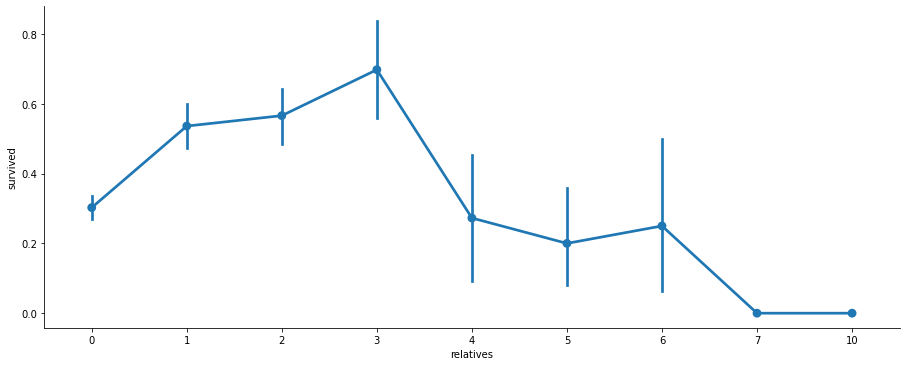

In [20]:
axes = sns.factorplot('relatives','survived', 
                      data=df, aspect = 2.5, )

**Not Much! people with 1 to 3 relatives had a higher chance of survival, but a lower one if one had less than 1 or more than 3**

# Handling Missing Data
Cabin, Age, Embarked

## Handling Missing Cabin Number
- The letter in the cabin number represents the deck.
- How about exploring the chance of survival with the deck?
- Maybe some decks were safer than the others!
- Hence, we are going to make a deck feature by extracting the letters out of cabin numbers.
- Then, we will convert the letters into numerical values. 
- The missing values will be converted to zero.

In [21]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

df['cabin'] = df['cabin'].fillna("U0")
df['deck'] = df['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
df['deck'] = df['deck'].map(deck)
df['deck'] = df['deck'].fillna(0)
df['deck'] = df['deck'].astype(int)

# we can now drop the cabin feature
df = df.drop(['cabin'], axis=1)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,relatives,alone,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,2,NaN,"St Louis, MO",0,1,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,0,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,0,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0,3


## Handling Missing Ages
- We will create an array that contains random numbers that are<br>computed based on the **mean** age value regarding to the **standard deviation** and **is_null**

In [23]:
mean = df["age"].mean()
std = df["age"].std()
is_null = df["age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
# fill missing ages with random values generated
age_slice = df["age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["age"] = age_slice
df["age"] = df["age"].astype(int)

df["age"].isnull().sum()

0

## Handling Missing Embarked
- The Embarked feature has only 2 missing values.
- Therfore, we will just fill these with the most common one.

In [24]:
df['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [25]:
common_value = 'S'
df['embarked'] = df['embarked'].fillna(common_value)
df["embarked"].isnull().sum()

0

### Handling missing boat, body, home destination
**We will delete these columns, they have too many missing that can't be handled**

In [27]:
df.drop(['boat','body','home.dest'], axis=1, inplace=True)

**Checking again to make sure there is no missing values**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   int32  
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   embarked   1309 non-null   object 
 10  relatives  1309 non-null   int64  
 11  alone      1309 non-null   int32  
 12  deck       1309 non-null   int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 117.7+ KB


### Great, Missing values handeled!
#### Let's see what's next!
- The ‘Fare’ feature is float.
- We have 4 categorical features: Name, Sex, Ticket and Embarked<br>That need to be transformed.
- Lets convert Fare to integer and transform the categorical features!

In [29]:
df['fare'] = df['fare'].fillna(0)
df['fare'] = df['fare'].astype(int)

**But Hey! I mentioned the Name as Categorical! Shouldn't name be discarded already?**<br>
- Well, the Name itself is useless indeed, however, in this dataset<br>the Name feature has titles that may be useful for our task
- Titles like (Dr, Lady, Ms, etc..)
- Let's see what can we do

In [32]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

# extract titles
df['title'] = df.name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
# replace titles with a more common title or as Rare
df['title'] = df['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['title'] = df['title'].replace('Mlle', 'Miss')
df['title'] = df['title'].replace('Ms', 'Miss')
df['title'] = df['title'].replace('Mme', 'Mrs')
    
# convert titles into numbers
df['title'] = df['title'].map(titles)
    
# filling NaN with 0, to get safe
df['title'] = df['title'].fillna(0)

df.drop(['name'], axis=1, inplace=True)

df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,relatives,alone,deck,title
0,1,1,female,29,0,0,24160,211,S,0,1,2,2
1,1,1,male,0,1,2,113781,151,S,3,0,3,4
2,1,0,female,2,1,2,113781,151,S,3,0,3,2
3,1,0,male,30,1,2,113781,151,S,3,0,3,1
4,1,0,female,25,1,2,113781,151,S,3,0,3,3


### Sex Encoding (0 for male / 1 for female)

In [33]:
genders = {"male": 0, "female": 1}

df['sex'] = df['sex'].map(genders)

### What to do with the Ticket feature?

In [34]:
df['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

- Since the Ticket feature has 929 unique tickets
- It will be difficult to convert them into useful categories. 
- So we will drop the entire feature from our dataset :(
- Goodbye Ticket!

In [36]:
df = df.drop(['ticket'], axis=1)
df.shape

(1309, 12)

### ‘Embarked’ feature Encoding

In [37]:
ports = {"S": 0, "C": 1, "Q": 2}

df['embarked'] = df['embarked'].map(ports)

# Ages Categorization

In [39]:
df['age'] = df['age'].astype(int)
df.loc[ df['age'] <= 11, 'age'] = 0
df.loc[(df['age'] > 11) & (df['age'] <= 18), 'age'] = 1
df.loc[(df['age'] > 18) & (df['age'] <= 22), 'age'] = 2
df.loc[(df['age'] > 22) & (df['age'] <= 27), 'age'] = 3
df.loc[(df['age'] > 27) & (df['age'] <= 33), 'age'] = 4
df.loc[(df['age'] > 33) & (df['age'] <= 40), 'age'] = 5
df.loc[(df['age'] > 40) & (df['age'] <= 66), 'age'] = 6
df.loc[ df['age'] > 66, 'age'] = 6

# let's see how it's distributed 
df['age'].value_counts()

6    248
4    239
3    209
5    197
2    171
1    154
0     91
Name: age, dtype: int64

# Fare Categorization

In [40]:
df.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,alone,deck,title
0,1,1,1,4,0,0,211,0,0,1,2,2
1,1,1,0,0,1,2,151,0,3,0,3,4
2,1,0,1,0,1,2,151,0,3,0,3,2
3,1,0,0,4,1,2,151,0,3,0,3,1
4,1,0,1,3,1,2,151,0,3,0,3,3
5,1,1,0,6,0,0,26,0,0,1,5,1
6,1,1,1,6,1,0,77,0,1,0,4,2
7,1,0,0,5,0,0,0,0,0,1,1,1
8,1,1,1,6,2,0,51,0,2,0,3,3
9,1,0,0,6,0,0,49,1,0,1,8,1


In [41]:
df.loc[ df['fare'] <= 7.91, 'fare'] = 0
df.loc[(df['fare'] > 7.91) & (df['fare'] <= 14.454), 'fare'] = 1
df.loc[(df['fare'] > 14.454) & (df['fare'] <= 31), 'fare']   = 2
df.loc[(df['fare'] > 31) & (df['fare'] <= 99), 'fare']   = 3
df.loc[(df['fare'] > 99) & (df['fare'] <= 250), 'fare']   = 4
df.loc[ df['fare'] > 250, 'fare'] = 5
df['fare'] = df['fare'].astype(int)

df.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,alone,deck,title
0,1,1,1,4,0,0,4,0,0,1,2,2
1,1,1,0,0,1,2,4,0,3,0,3,4
2,1,0,1,0,1,2,4,0,3,0,3,2
3,1,0,0,4,1,2,4,0,3,0,3,1
4,1,0,1,3,1,2,4,0,3,0,3,3
5,1,1,0,6,0,0,2,0,0,1,5,1
6,1,1,1,6,1,0,3,0,1,0,4,2
7,1,0,0,5,0,0,0,0,0,1,1,1
8,1,1,1,6,2,0,3,0,2,0,3,3
9,1,0,0,6,0,0,3,1,0,1,8,1


# X, Y Initialization

In [42]:
X = df.drop(["survived"], axis=1, inplace=False)
Y = df["survived"]

# Train Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Stochastic Gradient Descent

In [67]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred_SGD = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

print('Confusion Matrix')
print(confusion_matrix(y_pred_SGD,y_test))
print('Classification Report')
print(classification_report(y_pred_SGD,y_test))

Confusion Matrix
[[81 24]
 [63 94]]
Classification Report
              precision    recall  f1-score   support

           0       0.56      0.77      0.65       105
           1       0.80      0.60      0.68       157

    accuracy                           0.67       262
   macro avg       0.68      0.69      0.67       262
weighted avg       0.70      0.67      0.67       262



# Random Forest

In [68]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred_RF = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

print('Confusion Matrix')
print(confusion_matrix(y_pred_RF,y_test))
print('Classification Report')
print(classification_report(y_pred_RF,y_test))

Confusion Matrix
[[129  45]
 [ 15  73]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       174
           1       0.62      0.83      0.71        88

    accuracy                           0.77       262
   macro avg       0.76      0.79      0.76       262
weighted avg       0.80      0.77      0.78       262



# Logistic Regression

In [69]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_LR = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

print('Confusion Matrix')
print(confusion_matrix(y_pred_LR,y_test))
print('Classification Report')
print(classification_report(y_pred_LR,y_test))

Confusion Matrix
[[125  38]
 [ 19  80]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.77      0.81       163
           1       0.68      0.81      0.74        99

    accuracy                           0.78       262
   macro avg       0.77      0.79      0.78       262
weighted avg       0.80      0.78      0.79       262



# K-Nearest Neighbours

In [70]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

y_pred_KNN = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)

print('Confusion Matrix')
print(confusion_matrix(y_pred_KNN,y_test))
print('Classification Report')
print(classification_report(y_pred_KNN,y_test))

Confusion Matrix
[[123  46]
 [ 21  72]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       169
           1       0.61      0.77      0.68        93

    accuracy                           0.74       262
   macro avg       0.73      0.75      0.73       262
weighted avg       0.77      0.74      0.75       262



# Gaussian Naive Bayes

In [71]:
gaussian = GaussianNB()

gaussian.fit(X_train, y_train)

y_pred_GNB = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

print('Confusion Matrix')
print(confusion_matrix(y_pred_GNB,y_test))
print('Classification Report')
print(classification_report(y_pred_GNB,y_test))

Confusion Matrix
[[117  30]
 [ 27  88]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       147
           1       0.75      0.77      0.76       115

    accuracy                           0.78       262
   macro avg       0.78      0.78      0.78       262
weighted avg       0.78      0.78      0.78       262



# Simple Perceptron

In [72]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

y_pred_P = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

print('Confusion Matrix')
print(confusion_matrix(y_pred_P,y_test))
print('Classification Report')
print(classification_report(y_pred_P,y_test))

Confusion Matrix
[[126  42]
 [ 18  76]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       168
           1       0.64      0.81      0.72        94

    accuracy                           0.77       262
   macro avg       0.76      0.78      0.76       262
weighted avg       0.79      0.77      0.78       262



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


# Linear Support Vector Classifier

In [73]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred_SVC = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

print('Confusion Matrix')
print(confusion_matrix(y_pred_SVC,y_test))
print('Classification Report')
print(classification_report(y_pred_SVC,y_test))

Confusion Matrix
[[125  41]
 [ 19  77]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       166
           1       0.65      0.80      0.72        96

    accuracy                           0.77       262
   macro avg       0.76      0.78      0.76       262
weighted avg       0.79      0.77      0.77       262



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Decision Tree Classifier

In [74]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

y_pred_DT = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

print('Confusion Matrix')
print(confusion_matrix(y_pred_DT,y_test))
print('Classification Report')
print(classification_report(y_pred_DT,y_test))

Confusion Matrix
[[125  43]
 [ 19  75]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       168
           1       0.64      0.80      0.71        94

    accuracy                           0.76       262
   macro avg       0.75      0.77      0.75       262
weighted avg       0.78      0.76      0.77       262



# What's the best Model ?
Regarding Training Accuracy Score

In [80]:
results = pd.DataFrame({
    'Model': ['Support Vector Classifier', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Gaussian Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
91.12,Random Forest
91.12,Decision Tree
86.44,KNN
81.38,Logistic Regression
80.90,Support Vector Classifier
79.56,Perceptron
77.55,Gaussian Naive Bayes
61.51,Stochastic Gradient Decent


**Random Forest (RF) seems to be the best!**

**Sounds Great! Let's see models ROCs**

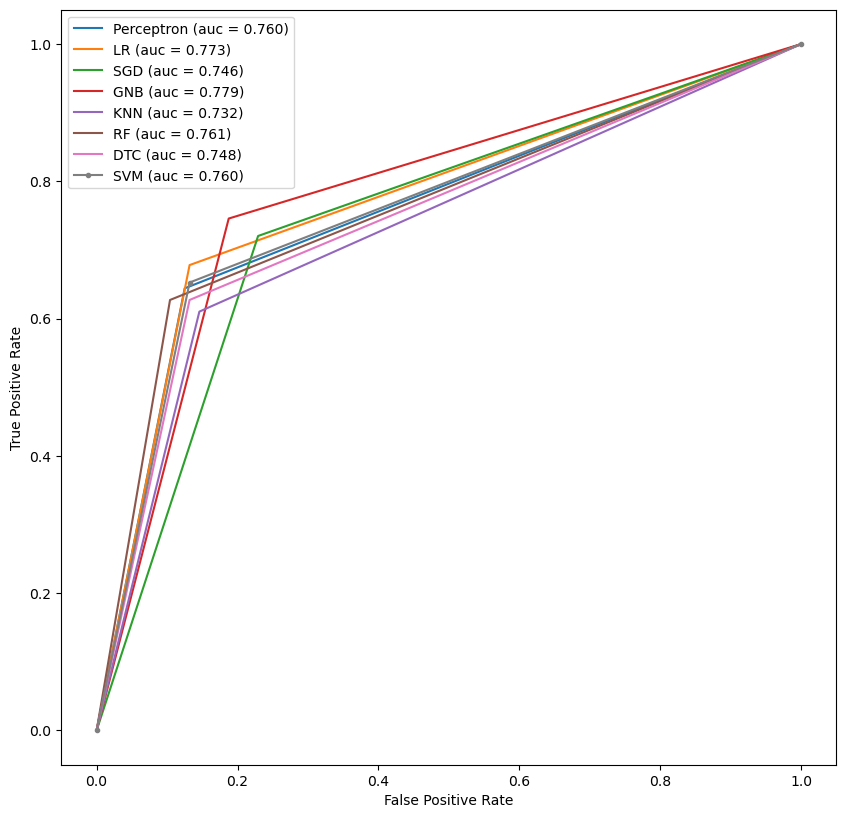

In [65]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 10), dpi=100)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_SVC)
auc_svm = auc(svm_fpr, svm_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_pred_DT)
auc_dt = auc(dt_fpr, dt_tpr)

p_fpr, p_tpr, threshold = roc_curve(y_test, y_pred_P)
auc_p = auc(p_fpr, p_tpr)

gnp_fpr, gnb_tpr, threshold = roc_curve(y_test, y_pred_GNB)
auc_gnp = auc(gnp_fpr, gnb_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_KNN)
auc_knn = auc(knn_fpr, knn_tpr)

lr_fpr, lr_tpr, threshold = roc_curve(y_test, y_pred_LR)
auc_lr = auc(lr_fpr, lr_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_RF)
auc_rf = auc(rf_fpr, rf_tpr)

sgd_fpr, sgd_tpr, threshold = roc_curve(y_test, y_pred_SGD)
auc_sgd = auc(sgd_fpr, sgd_tpr)

plt.plot(p_fpr, p_tpr, linestyle='-', label='Perceptron (auc = %0.3f)' % auc_p)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='LR (auc = %0.3f)' % auc_lr)
plt.plot(sgd_fpr, sgd_tpr, linestyle='-', label='SGD (auc = %0.3f)' % auc_sgd)
plt.plot(gnp_fpr, gnb_tpr, linestyle='-', label='GNB (auc = %0.3f)' % auc_gnp)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.3f)' % auc_rf)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DTC (auc = %0.3f)' % auc_dt)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

**From the ROC, Random Forest doesn't seem the best, However, Gaussian Naive Bayes Does!**

Which is true because GNB has the least incorrectly classified samples (FP+FN) when we tested it 

# Let's look at features importance from our RF

In [77]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
title,0.205
sex,0.173
age,0.145
fare,0.095
deck,0.090
pclass,0.089
relatives,0.063
embarked,0.051
sibsp,0.043


<AxesSubplot:xlabel='feature'>

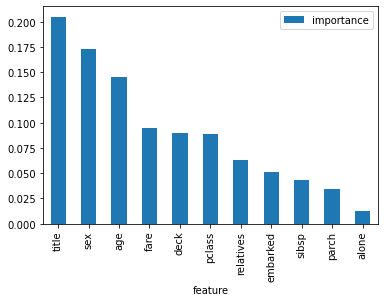

In [78]:
importances.plot.bar()

**That is surprising**<br>
- Title Playes a significant role in predicting the survival!
- Sex and Age too!
- As we expected, the whole relatives thing is not worth it<br>it was obvious from the factorplot we showed

# Conclusion
- We did extensive data exploration
- We performed a well-defined features engineering
- We pre-processed our data so it perfectly fits ML models
- Random Forest achieved the heighes training accuracy
- Gaussian Naive Bayes has the least incorrectly classified samples and the biggest AUC

## That's all for out Titanic survival prediction problem
**Hope you enjoyed and learned!**
Please, share if you find this useful!
<br><br>
Best Regards,<br>
Ibrahim M. Nasser